In [1]:
import simpy
import random
import statistics
import pandas as pd
import matplotlib.pyplot as plt

Running simulation... 
The average wait time is 4 minutes and 5 seconds.


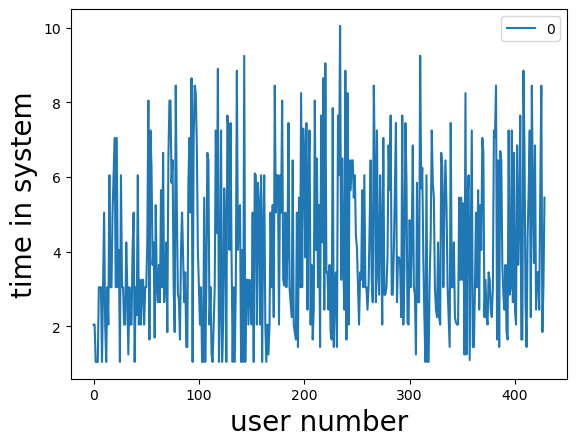

In [2]:
# Adapted from Simpy companion

system_times = []


class Theater(object):
    def __init__(self, env, num_cashiers, num_servers, num_ushers):
        self.env = env
        self.cashier = simpy.Resource(env, num_cashiers)
        self.server = simpy.Resource(env, num_servers)
        self.usher = simpy.Resource(env, num_ushers)

    def purchase_ticket(self, moviegoer):
        yield self.env.timeout(random.randint(1, 3))

    def sell_food(self, moviegoer):
        yield self.env.timeout(random.randint(1, 5))

    def check_ticket(self, moviegoer):
        yield self.env.timeout(3 / 60)

 #yield - palabra reservada de simpy para generar momentos asincronos en una simulación   

def go_to_movies(env, moviegoer, theater):
    # Moviegoer arrives at the theater
    arrival_time = env.now

    with theater.cashier.request() as request:
        yield request
        yield env.process(theater.purchase_ticket(moviegoer))

    if random.choice([True, False]):
        with theater.server.request() as request:
            yield request
            yield env.process(theater.sell_food(moviegoer))

    with theater.usher.request() as request:
        yield request
        yield env.process(theater.check_ticket(moviegoer))

    
    # Moviegoer heads into the theater
    system_times.append(env.now - arrival_time)


def run_theater(env, num_cashiers, num_servers, num_ushers):
    theater = Theater(env, num_cashiers, num_servers, num_ushers)

    for moviegoer in range(3):
        env.process(go_to_movies(env, moviegoer, theater))
        #print("movie goer:",moviegoer)

    while True:
        yield env.timeout(0.20)  # Wait a bit before generating a new person

        moviegoer += 1
        env.process(go_to_movies(env, moviegoer, theater))
        #print("movie goer:",moviegoer)


def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)


def main():
    # Setup
    random.seed(42)
    num_cashiers = 10
    num_servers = 9
    num_ushers = 2

    # Run the simulation
    env = simpy.Environment()
    env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
    env.run(until=90)

    # View the results
    mins, secs = get_average_wait_time(system_times)
    print(
        "Running simulation...",
        f"\nThe average wait time is {mins} minutes and {secs} seconds.",
    )

    # Save the results
    df = pd.DataFrame(system_times)
    df.to_csv("system_times.csv")
    
    # Display the results 
    df.plot()
    plt.xlabel('user number', fontsize=20)
    plt.ylabel('time in system', fontsize=20)
    plt.show()


if __name__ == "__main__":
    main()


### Clase

In [3]:
class CongruentialRandomGenerator:
    def __init__(self, seed, a, c, m):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def generate(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m

# Ejemplo de uso
random = []
if __name__ == "__main__":
    seed = 2020
    a = (2**16) + 1
    c = 0
    m = (2**31) + 3
    num_iterations = 10000

    rng = CongruentialRandomGenerator(seed, a, c, m)

    for i in range(num_iterations):
        random_number = rng.generate()
        random.append(random_number)
random

[0.06164644836218127,
 0.1232863122737692,
 0.8150474860122695,
 0.7670907861081546,
 0.8288491701304226,
 0.28806283750376266,
 0.7741814840945674,
 0.531923105662796,
 0.6445758226636203,
 0.5656899056876685,
 0.6193490527299944,
 0.27886876564630947,
 0.22229416218265774,
 0.4925069648411493,
 0.4289547944036944,
 0.41036083491934344,
 0.8180381090128261,
 0.7635503735902481,
 0.8008339840907128,
 0.25681535304968894,
 0.9077928174643878,
 0.017878163580952917,
 0.6812066049111914,
 0.23726606475571255,
 0.7060858951330847,
 0.7513093369761817,
 0.56001740802077,
 0.8608694572082681,
 0.8016170582711458,
 0.5771479160844145,
 0.5429764242708081,
 0.04591743595071495,
 0.2909999020057732,
 0.2605777523565417,
 0.4841561906726712,
 0.1442681148495505,
 0.8994428949904029,
 0.7890089860339523,
 0.2819177071350845,
 0.040772512032502546,
 0.10812107411941363,
 0.9308345640113095,
 0.10482160918672344,
 0.6938012702942808,
 0.6538512762814975,
 0.45109366050302935,
 0.3252283870355761,
 

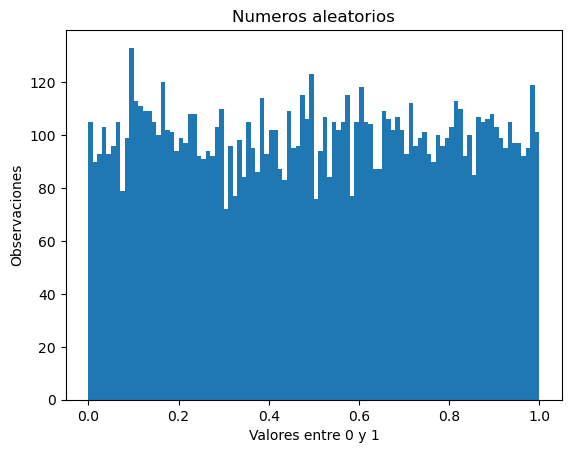

In [4]:
plt.hist(random, bins=100)
plt.title('Numeros aleatorios')
plt.xlabel('Valores entre 0 y 1')
plt.ylabel('Observaciones')
plt.show()

In [5]:
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import acf

In [6]:
import statsmodels.api as sm

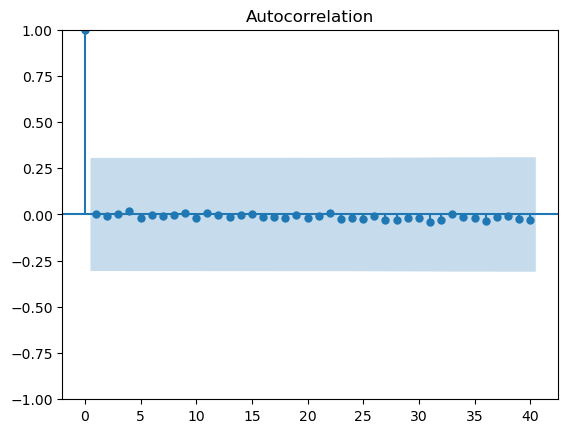

In [7]:
autocorrelacion = acf(random)
sm.graphics.tsa.plot_acf(autocorrelacion, lags=40)
plt.show()

In [8]:
autocorrelacion

array([ 1.00000000e+00,  2.59019304e-03, -6.13396855e-03,  2.19208321e-03,
        2.04764606e-02, -1.86996746e-02,  2.47281511e-04, -3.53964973e-03,
       -1.76497275e-04,  1.11504092e-02, -1.49309381e-02,  1.33204681e-02,
        3.67809791e-03, -8.20415259e-03,  5.14311707e-03,  7.56876696e-03,
       -5.46232677e-03, -5.49175468e-03, -1.23348951e-02,  8.36631881e-03,
       -7.69019121e-03,  5.07233921e-03,  1.68340008e-02, -1.06878338e-02,
       -6.29161733e-03, -1.25926987e-02,  3.90214235e-03, -1.63790091e-02,
       -1.29673914e-02, -1.78357160e-04, -2.09758043e-04, -2.43654179e-02,
       -9.85046986e-03,  2.17192515e-02,  4.00640060e-03, -2.70526808e-04,
       -1.37396923e-02,  1.03726522e-02,  1.56919270e-02, -8.77800397e-04,
       -9.45289594e-03])

Se mide la correlación entre cada pareja de numeros Corr(Ri, Ri+1). El gráfico muestra que efectivamente no existe una correlación entre los valores

### Distribución exponencial

In [9]:
import numpy as np

In [10]:
x = []
lamba = 20

for i in range(num_iterations):
    inversa = (-np.log(1-random[i]))/lamba
    x.append(inversa)
    
x

[0.0031814240135031057,
 0.00657874038635943,
 0.08438280839997295,
 0.07285532706474836,
 0.0882605032616277,
 0.016988281319293544,
 0.0744011814637917,
 0.03795613462108061,
 0.051722166852718764,
 0.04169982484968447,
 0.04829362363369767,
 0.01634670705630953,
 0.012570346339680363,
 0.0339136145992646,
 0.028014345164471384,
 0.02641222568927911,
 0.08519790020054449,
 0.07210100449451604,
 0.08068082756254938,
 0.014840537486415043,
 0.11918586248829999,
 0.0009019954325256256,
 0.05716060251604112,
 0.013542300861689394,
 0.061223385732360504,
 0.06957727360032684,
 0.041051005826803086,
 0.09861713149040988,
 0.08087780335085151,
 0.04303664222520263,
 0.03915101506948413,
 0.0023502533076813535,
 0.017194980711765638,
 0.015094307207645218,
 0.03309756272120298,
 0.007789908509283574,
 0.11485147519009634,
 0.07779698671257974,
 0.016558555124180467,
 0.002081350924949074,
 0.005721244446622819,
 0.13356270105361925,
 0.005536613061215,
 0.05917604721720852,
 0.05304433794706

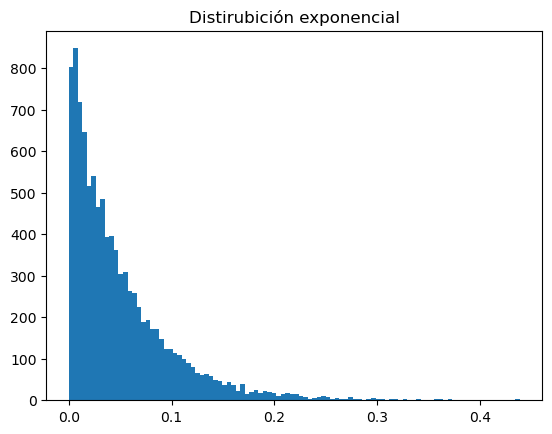

In [11]:
plt.hist(x, bins=100)
plt.title('Distirubición exponencial')
plt.show()

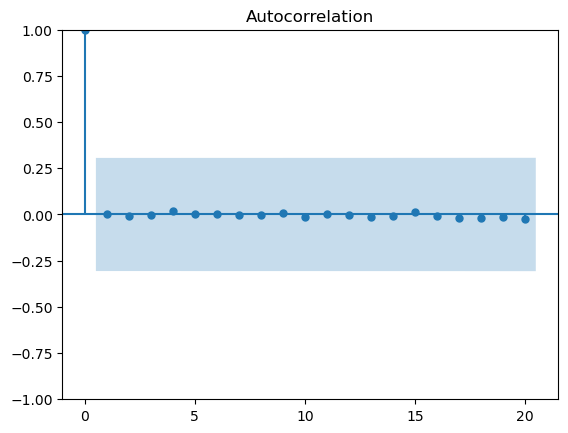

In [12]:
autocorrelacion = acf(x)
sm.graphics.tsa.plot_acf(autocorrelacion, lags=20)
plt.show()

### Distribución triangular

In [21]:
#Generación de números aleatorios
class CongruentialRandomGenerator:
    def __init__(self, seed, a, c, m):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def generate(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m

# Generando el primer
random_1 = []
random_2 = []
if __name__ == "__main__":
    seed = 2020
    a = (2**16) + 1
    c = 0
    m = (2**31) + 3
    num_iterations_t = 10

    rng_1 = CongruentialRandomGenerator(seed, a, c, m)

    for i in range(num_iterations_t):
        random_number = rng_1.generate()
        random_1.append(random_number)
        
    rng_2 = CongruentialRandomGenerator(seed, a, c, m)

    for i in range(num_iterations_t):
        random_number = rng_2.generate()
        random_2.append(random_number)



In [ ]:
a = 5
b = 10
c = 15

rango_1 = 0
rango_2 = ((c - a)**2) / ((b - a)(c - a))
rango_3 = 1 

In [ ]:
x = []
a = 5
b = 10
c = 15

range_0 = 0
range_1 = ((c - a)**2) / ((b - a)(c - a))
range_2 = 

for i in range(num_iterations):
    
    inversa = (-np.log(1-random[i]))/lamba
    x.append(inversa)
    
x